# Use case 1:  
The accompanying file titled transcripts_v3.zip contains examples of call transcripts with both the agent and customer transcripts being provided.

## Question 1:

Use a large language model of your choice to analyse the customer side of the transcript only and:  

- 1) Identify the sentiment (positive, negative, neutral) of the call.  
- 2) Determine call outcome (issue resolved, follow-up action needed).   


### Solution 1:  

1) Identify and install necessary libraries.
2) Set up API calls to LLM.
3) Optimize the prompt.
4) Loop through the transcripts and make calls to LLM.
   1) Identify the sentiment (positive, negative, neutral) of the call.  
   2) Determine call outcome (issue resolved, follow-up action needed). 
5) Store the output in a dataframe.


In [42]:
# 1) Identify and install necessary libraries.

import pandas as pd
import os
from openai import OpenAI
# import openai
from env_variables import apikey, gptmodel
import openpyxl
import re
import json
import time
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
# 2) Set up API calls to LLM.

def openai_inferencing(input_llm):
    '''
    Input = str: input to the llm, str: gpt model 3.5, 4o, etc
    Output = result from llm.
    
    '''

    client = OpenAI(api_key = apikey)

    output = client.chat.completions.create(
            model= gptmodel,
            messages=[
            {"role": "system", "content": input_llm}],
            max_tokens=50,
            temperature=0 )

    # Return the output.
    return output


In [3]:
# 3) Optimize the prompt.txtdef gpt_input(transcript_path):

def gpt_input(transcript_path):
    '''
    Input = transcript_path
    Output = Prompt + transcript
    '''

    # Optimized prompt.
    prompt = """
--reset

Follow the instructions.

[Instructions] 
1) Only use the following Call Transcript as reference.  
2) The customer can also be mentioned as Member, Caller.  
3) Understand meaning, intent and context of the conversation.  
4) Identify the Sentinement: Positive, Negative or Neutral.  
5) Call Outcome: Issue Resolved, Followup Action needed.  
6) When the Customer is referred to a different team for support, it means the call outcome = "Followup Action needed".  
7) Skip the intro and strictly only use the Output format = {Sentinement } - {Call Outcome}.

[Call Transcript]
"""

    # Import the transcript.
    with open(transcript_path, 'r') as txtfile:
        input_transcript = txtfile.read()

    # Build the input string.
    input_string = prompt + input_transcript

    # Return the string.
    return input_string, input_transcript


In [4]:
# 4) Loop through the transcripts in the folder.

# Retrieves all the file paths of the FAQ chunks and turns them into a dictionary
def get_all_file_paths(directory):
    file_paths=[]

    for root, dirs, files in os.walk(directory):
        for file in files:

            file_path = os.path.join(root, file)
            file_paths.append(file_path)  # Append file paths.

    # Returning file path.
    return file_paths


In [5]:
# Compare prompts and obtain output excel.
def comparePrompts_excelOutput(transcripts_path, excelname):
    '''
    Input = transcript folder path, output excel name.
    Output = Returns a df, also outputs and excel.
    '''
    # Declaring a list to store results.
    resultslist = []

    # Obtain all the transcripts.
    all_transcripts = get_all_file_paths(transcripts_path)

    # Looping through the transcripts and processing them.
    for transcript_path in all_transcripts:
        # Initialize a new dictionary for each transcript.
        result_dict = {}

        # Obtain the llm_input
        input_llm, transcript = gpt_input(transcript_path)
        output = openai_inferencing(input_llm)

        # Output response message from llm.
        output_message = output.choices[0].message.content

        # Append transcript name.
        result_dict['File name'] = Path(transcript_path).name

        # Append transcript content.
        result_dict['Transcript'] = transcript

        # Split the string by the delimiter ' - ' and assign to two variables.
        sentiment, call_outcome = output_message.split(' - ', 1)

        # Append Sentiment and Call Outcome.
        result_dict['Sentiment'] = sentiment.strip()
        result_dict['Call_Outcome'] = call_outcome.strip()

        # Collecting data to be used to build a dataframe.
        result_dict["Raw_Outcome"] = output_message

        # Append the dict to a list.
        resultslist.append(result_dict)

        # Wait for 2 seconds to avoid rate limits.
        time.sleep(2)

        # Print the current list of results (optional).
        print("Processing trascript :  ", str(result_dict['File name']))

    # Saving to dataframe.
    transcripts_df = pd.DataFrame(resultslist)

    # Saving as an Excel file.
    transcripts_df.to_excel(excelname, index=False)

    return transcripts_df

In [ ]:
# Building the transcript path.
folder_path = "C:/Users/abhis/OneDrive/Documents/Abhishek_Documents/Professional/AXA/DS_Interview/transcripts_v3"
excel_path = "Usecase1_output_3.xlsx"

# Outputs the result as an excel and a dataframe.
transcripts_df = comparePrompts_excelOutput(folder_path, excel_path)

## Question 2:  
Use appropriate metrics to monitor the performance of your model.  


## Solution:
- 20 transcripts were randomly selected to be manually labelled.
- The Analysis can be found in the 'Analysis' tab of the Excel named 'Usecase1_output_1.xlsx'. The following have been analysed for 'Sentiment' and 'Call Outcome':

    - Confusion matrix
    - Accuracy
    - Precision
    - Recall
    - F1 Score


### Sentiment Analysis:

| Sentiment Analysis  | Predicted Positive | Predicted Negative | Predicted Neutral |
|---------------------|--------------------|--------------------|-------------------|
| **Actual Positive**  | 13                 | 0                  | 0                 |
| **Actual Negative**  | 0                  | 4                  | 0                 |
| **Actual Neutral**   | 0                  | 1                  | 2                 |

  
    
      
   

   

| Metric     | Class    | Value  |
|------------|----------|--------|
| **Accuracy**       |          | 95%    |
| **Precision**      | Positive | 100%   |
|                    | Negative | 80%    |
|                    | Neutral  | 100%   |
| **Recall**         | Positive | 100%   |
|                    | Negative | 100%   |
|                    | Neutral  | 67%    |
| **F1 Score**       | Positive | 100%   |
|                    | Negative | 89%    |
|                    | Neutral  | 80%    |



###  Call Outcome:

| Call Outcome      | Predicted Followup | Predicted Resolved |
|-------------------|--------------------|--------------------|
| **Actual Followup**  | 12                 | 1                  |
| **Actual Resolved**  | 0                  | 7                  |





| Metric       | Class    | Value  |
|--------------|----------|--------|
| **Accuracy** |          | 95%    |
| **Precision**| Followup | 100%   |
|              | Resolved | 88%    |
| **Recall**   | Followup | 92%    |
|              | Resolved | 100%   |
| **F1 Score** | Followup | 96%    |
|              | Resolved | 93%    |


## Question 3:  
Use methods of your choice (e.g. exploratory data analysis, statistical methods, visualisations etc.)  to extract useful insights from the data.

## Solution:

### a) Sentiment Distribution:

In [37]:
# Distribution of sentiment categories.

# Copy the transcript_df to a df and process it.
# Remove rows where 'File name' equals 'manifest.mf'
df = transcripts_df.copy()
df = df[df['File name'] != 'manifest.mf']


sentiment_dist = df['Sentiment'].value_counts(normalize=True) * 100
print('\nThe values are in percentages.\n')
print(sentiment_dist)



The values are in percentages.

Sentiment
Positive    77.0
Negative    13.5
Neutral      9.5
Name: proportion, dtype: float64


### b) Call Outcome Distribution:

In [38]:
# Distribution of call outcomes
outcome_dist = df['Call_Outcome'].value_counts(normalize=True) * 100
print('\nThe values are in percentages.\n')
print(outcome_dist)



The values are in percentages.

Call_Outcome
Issue Resolved            62.5
Followup Action needed    37.5
Name: proportion, dtype: float64


### c) Cross-tabulation (Sentiment vs Call Outcome)

In [39]:
# Cross-tabulation between Sentiment and Call Outcome

cross_tab = pd.crosstab(df['Sentiment'], df['Call_Outcome'], margins=True)
cross_tab


Call_Outcome,Followup Action needed,Issue Resolved,All
Sentiment,,,
Negative,22,5,27
Neutral,18,1,19
Positive,35,119,154
All,75,125,200


### d) Visualization:

#### i) Sentiment Distribution - Bar Plot

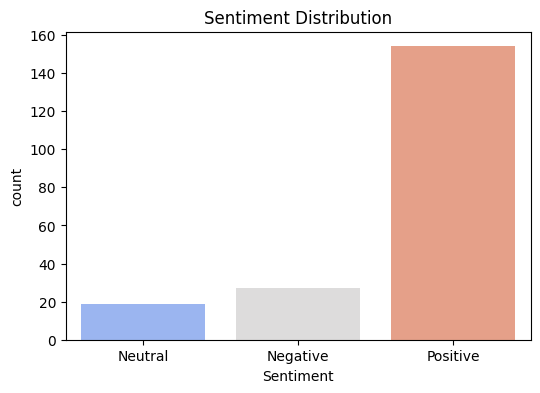

In [43]:
# Sentiment distribution plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


#### ii) Call outcome - Bar Plot

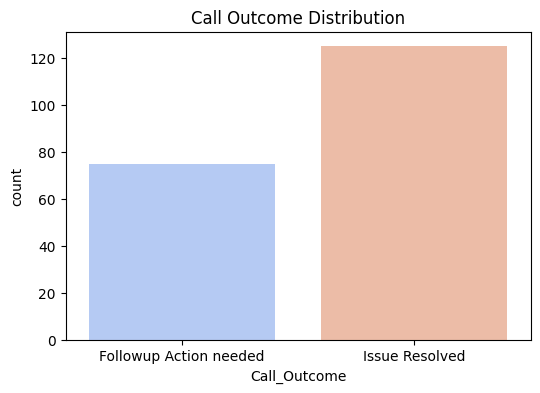

In [44]:
# Call outcome distribution plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Call_Outcome', palette='coolwarm')
plt.title('Call Outcome Distribution')
plt.show()


#### iii) Sentiment vs Call Outcome - Heatmap

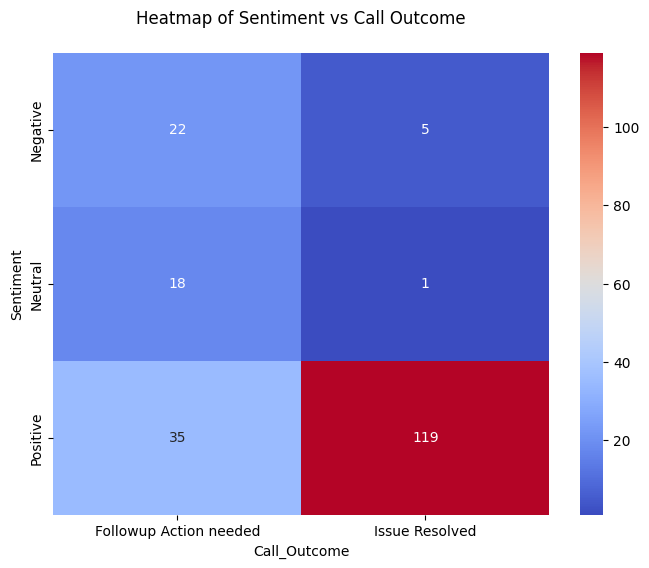

In [46]:
# Heatmap for Sentiment vs Call Outcome
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['Sentiment'], df['Call_Outcome']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Sentiment vs Call Outcome\n')
plt.show()

#### iv) Sentiment and Call Outcome - Co-occurence

In [50]:
# Co-occurrence of Sentiment and Call Outcome
df['Sentiment_Outcome'] = df['Sentiment'] + ' - ' + df['Call_Outcome']
sentiment_outcome_dist = df['Sentiment_Outcome'].value_counts(normalize=True) * 100

print('\nThe values are in percentage:\n')
print(sentiment_outcome_dist)


The values are in percentage:

Sentiment_Outcome
Positive - Issue Resolved            59.5
Positive - Followup Action needed    17.5
Negative - Followup Action needed    11.0
Neutral - Followup Action needed      9.0
Negative - Issue Resolved             2.5
Neutral - Issue Resolved              0.5
Name: proportion, dtype: float64


#### v) Sentiment Polarity vs Call Outcome Efficiency


In [52]:
# Proportion of "Issue Resolved" vs "Followup Action Needed" per sentiment
resolved_ratio = df.groupby('Sentiment')['Call_Outcome'].apply(lambda x: (x == 'Issue Resolved').mean() * 100)

print('\nThe values are in percentage:\n')
print(resolved_ratio)



The values are in percentage:

Sentiment
Negative    18.518519
Neutral      5.263158
Positive    77.272727
Name: Call_Outcome, dtype: float64
